In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt')
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/MasterMBD/Analisis de datos no estructurados/analisis_de_datos_no_estructurados/practica_texto')
print(os.listdir("data/"))
# import warnings
# warnings.filterwarnings('ignore')

['Corona_NLP_test.csv', 'Corona_NLP_train.csv']


In [ ]:
import warnings
warnings.filterwarnings('ignore')

corona_data_train = pd.read_csv('data/Corona_NLP_train.csv', encoding='cp437', on_bad_lines = 'skip')
corona_data_train = corona_data_train.loc[(corona_data_train['Sentiment'] == "Positive") | (corona_data_train['Sentiment'] == "Negative")]

corona_data_test = pd.read_csv('data/Corona_NLP_test.csv', encoding='cp437', on_bad_lines = 'skip')
corona_data_test = corona_data_test.loc[(corona_data_test['Sentiment'] == "Positive") | (corona_data_test['Sentiment'] == "Negative")]

print("TRAIN", corona_data_train.shape)
print("TEST", corona_data_test.shape)

TRAIN (21339, 6)
TEST (1988, 6)


In [ ]:
corona_data_test.head()


UserName  ScreenName                Location     TweetAt  \
1          2       44954             Seattle, WA  02-03-2020   
3          4       44956             Chicagoland  02-03-2020   
6          7       44959                     NaN  03-03-2020   
10        11       44963  Boksburg, South Africa  04-03-2020   
14        15       44967          Washington, DC  04-03-2020   

                                        OriginalTweet Sentiment  
1   When I couldn't find hand sanitizer at Fred Me...  Positive  
3   #Panic buying hits #NewYork City as anxious sh...  Negative  
6   Voting in the age of #coronavirus = hand sanit...  Positive  
10  Best quality couches at unbelievably low price...  Positive  
14  While we were busy watching election returns a...  Positive

## Segementacion de tweets

In [ ]:
from nltk.tokenize import sent_tokenize #Sirve para tokenizar frases

def get_sent_tokens(data):
    """Sentence tokenization"""
    sentences = []
    for sent in data:
        sentences.extend(sent_tokenize(sent))
    print(sentences)
    return sentences


In [ ]:
sample_sentences = get_sent_tokens(corona_data_test["OriginalTweet"])

["When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon.", 'But $114.97 for a 2 pack of Purell??!', '!Check out how  #coronavirus concerns are driving up prices.', 'https://t.co/ygbipBflMY', '#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?', 'https://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu', 'Voting in the age of #coronavirus = hand sanitizer ?', '#SuperTuesday https://t.co/z0BeL4O6Dk', 'Best quality couches at unbelievably low prices available to order.', 'We are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\n#Covid_19 #SayEntrepreneur \r\r\n#DJSBU https://t.co/HhDJhyQ2Dc', 'While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-

## Tokenización de palabras

In [ ]:
from nltk.tokenize import word_tokenize #Sirve para tokenizar palabras

def get_word_tokens(sentences):
    '''Word tokenization'''
    words = []
    for sent in sentences:
        words.extend(word_tokenize(sent))
    print(words)
    return(words)

In [ ]:
sample_words = get_word_tokens(sample_sentences)

['When', 'I', 'could', "n't", 'find', 'hand', 'sanitizer', 'at', 'Fred', 'Meyer', ',', 'I', 'turned', 'to', '#', 'Amazon', '.', 'But', '$', '114.97', 'for', 'a', '2', 'pack', 'of', 'Purell', '?', '?', '!', '!', 'Check', 'out', 'how', '#', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices', '.', 'https', ':', '//t.co/ygbipBflMY', '#', 'Panic', 'buying', 'hits', '#', 'NewYork', 'City', 'as', 'anxious', 'shoppers', 'stock', 'up', 'on', 'food', '&', 'amp', ';', 'medical', 'supplies', 'after', '#', 'healthcare', 'worker', 'in', 'her', '30s', 'becomes', '#', 'BigApple', '1st', 'confirmed', '#', 'coronavirus', 'patient', 'OR', 'a', '#', 'Bloomberg', 'staged', 'event', '?', 'https', ':', '//t.co/IASiReGPC4', '#', 'QAnon', '#', 'QAnon2018', '#', 'QAnon2020', '#', 'Election2020', '#', 'CDC', 'https', ':', '//t.co/29isZOewxu', 'Voting', 'in', 'the', 'age', 'of', '#', 'coronavirus', '=', 'hand', 'sanitizer', '?', '#', 'SuperTuesday', 'https', ':', '//t.co/z0BeL4O6Dk', 'Best', 'quality', '

In [ ]:
import matplotlib
from nltk.probability import FreqDist
#matplotlib.use('TkAgg') 

def plot_freq_dist(words, num_words = 20):
    fdist = FreqDist(words)
    fdist.plot(num_words,cumulative=False)

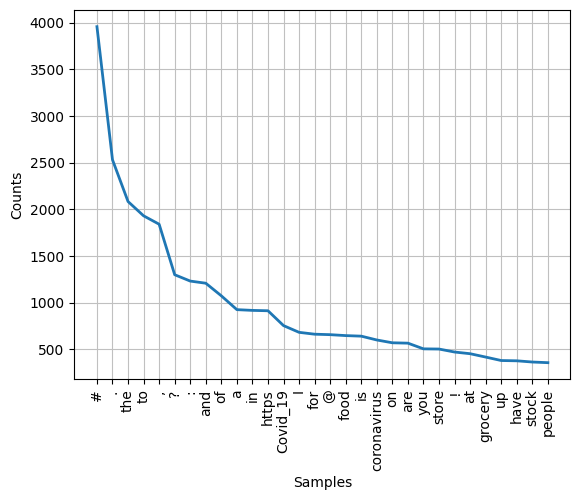

In [ ]:
# plot_freq_dist(sample_words, num_words=10)
plot_freq_dist(sample_words, num_words=30)

## Limpieza de los tweets

Como se puede ver en la anterior grafica, muchs de las palabras que salen, son del tipo stopwords o caracteres especiales. 

Se va a proceder a limpiar la columna de 'OriginalTweet'

In [ ]:
# Crear una función para limpiar los tweets
def limpiar_tweet(tweet):
    # Eliminar caracteres especiales y enlaces
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Convertir a minúsculas
    tweet = tweet.lower()

    # Eliminar stopwords
    stopwords_esp = set(stopwords.words('english'))
    palabras = tweet.split()
    palabras_limpias = [palabra for palabra in palabras if palabra not in stopwords_esp]
    tweet_limpiado = ' '.join(palabras_limpias)

    return tweet_limpiado

# Aplicar la función de limpieza a la columna 'OriginalTweet'
corona_data_test['CleanTweet'] = corona_data_test['OriginalTweet'].apply(limpiar_tweet)

In [ ]:
corona_data_test.head()

UserName  ScreenName                Location     TweetAt  \
1          2       44954             Seattle, WA  02-03-2020   
3          4       44956             Chicagoland  02-03-2020   
6          7       44959                     NaN  03-03-2020   
10        11       44963  Boksburg, South Africa  04-03-2020   
14        15       44967          Washington, DC  04-03-2020   

                                        OriginalTweet Sentiment  \
1   When I couldn't find hand sanitizer at Fred Me...  Positive   
3   #Panic buying hits #NewYork City as anxious sh...  Negative   
6   Voting in the age of #coronavirus = hand sanit...  Positive   
10  Best quality couches at unbelievably low price...  Positive   
14  While we were busy watching election returns a...  Positive   

                                           CleanTweet  
1   couldnt find hand sanitizer fred meyer turned ...  
3   panic buying hits newyork city anxious shopper...  
6   voting age coronavirus hand sanitizer supertue...  
10  best quality couches unbelievably low prices a...  
14  busy watching election returns bracing covid19...

Como se puede ver, la columna de CleanTweet, es una copia de la columna OriginalTweet, pero sin caracteres especiales y sin stopwords. 

Ahora se va  aproceder a hacer lo anterior para ver si la gráfica cambia, ya que las palabras que más aparecían era de este tipo de palabras. 

In [ ]:
sample_sentences_clean = get_sent_tokens(corona_data_test["CleanTweet"])

['couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices', 'panic buying hits newyork city anxious shoppers stock foodampmedical supplies healthcare worker 30s becomes bigapple 1st confirmed coronavirus patient bloomberg staged event qanon qanon2018 qanon2020 election2020 cdc', 'voting age coronavirus hand sanitizer supertuesday', 'best quality couches unbelievably low prices available order boksburg gp info whatsapp 084 764 8086 supertuesdsy powertalk covid_19 sayentrepreneur djsbu', 'busy watching election returns bracing covid19 outbreak trump nominated chemicalindustry lobbyist head consumer product safety commission', 'thats week bit optimistic probably take another month supply chain may recovering demand chain nonexistent us europe next month two spx qqq es nq', 'coronavirus covid_19 people starting become frightened panicshopping many shelves meanwhile turn empty goods sold facemasks amp disinfection liquid sold sold ex

In [ ]:
sample_words_clean = get_word_tokens(sample_sentences_clean)

['couldnt', 'find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', '11497', '2', 'pack', 'purellcheck', 'coronavirus', 'concerns', 'driving', 'prices', 'panic', 'buying', 'hits', 'newyork', 'city', 'anxious', 'shoppers', 'stock', 'foodampmedical', 'supplies', 'healthcare', 'worker', '30s', 'becomes', 'bigapple', '1st', 'confirmed', 'coronavirus', 'patient', 'bloomberg', 'staged', 'event', 'qanon', 'qanon2018', 'qanon2020', 'election2020', 'cdc', 'voting', 'age', 'coronavirus', 'hand', 'sanitizer', 'supertuesday', 'best', 'quality', 'couches', 'unbelievably', 'low', 'prices', 'available', 'order', 'boksburg', 'gp', 'info', 'whatsapp', '084', '764', '8086', 'supertuesdsy', 'powertalk', 'covid_19', 'sayentrepreneur', 'djsbu', 'busy', 'watching', 'election', 'returns', 'bracing', 'covid19', 'outbreak', 'trump', 'nominated', 'chemicalindustry', 'lobbyist', 'head', 'consumer', 'product', 'safety', 'commission', 'thats', 'week', 'bit', 'optimistic', 'probably', 'take', 'another', '

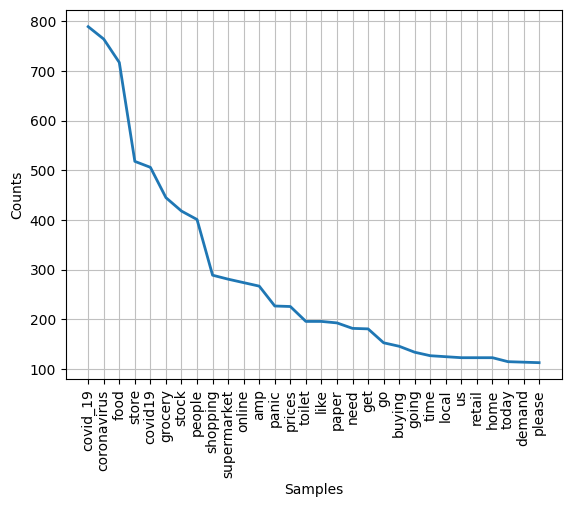

In [ ]:
plot_freq_dist(sample_words_clean, num_words=30)

Despues de eliminar las stopwords y los caracteres especiales, las palabras que más aparecen en el dataset son las de 'covid_19', 'coronavirus' y 'food'. 

Viendo el resto de palabras que aparecen como las más repetidas, se podría pensar que la mayoria de los tweets son de la situación que ocurrio en los supermercados cuando ocurrio la pandemia.

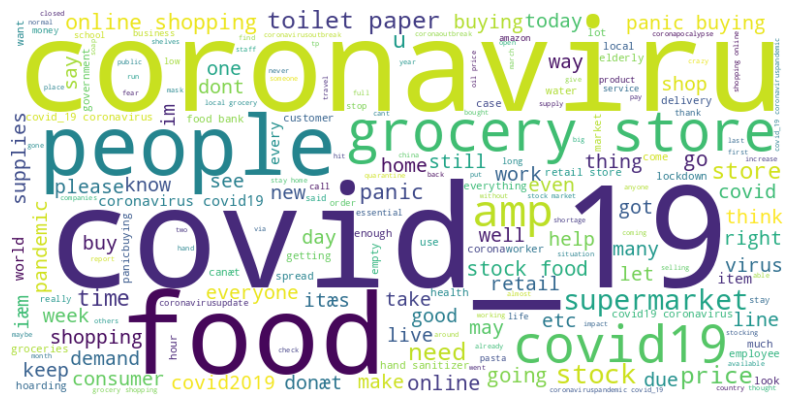

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Unir todos los tweets en un solo texto
text = ' '.join(corona_data_test['CleanTweet'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar el wordcloud utilizando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Procesamiento de texto
### Stemming

In [ ]:
# Stemming and lemmatization
from nltk.stem import PorterStemmer

def get_stems(words):
    ps = PorterStemmer()
    stems = []
    for word in words:
        stems.append(ps.stem(word))
    print(stems)
    return stems

In [ ]:
sample_stems_clean = get_stems(sample_words_clean)

['couldnt', 'find', 'hand', 'sanit', 'fred', 'meyer', 'turn', 'amazon', '11497', '2', 'pack', 'purellcheck', 'coronaviru', 'concern', 'drive', 'price', 'panic', 'buy', 'hit', 'newyork', 'citi', 'anxiou', 'shopper', 'stock', 'foodampmed', 'suppli', 'healthcar', 'worker', '30', 'becom', 'bigappl', '1st', 'confirm', 'coronaviru', 'patient', 'bloomberg', 'stage', 'event', 'qanon', 'qanon2018', 'qanon2020', 'election2020', 'cdc', 'vote', 'age', 'coronaviru', 'hand', 'sanit', 'supertuesday', 'best', 'qualiti', 'couch', 'unbeliev', 'low', 'price', 'avail', 'order', 'boksburg', 'gp', 'info', 'whatsapp', '084', '764', '8086', 'supertuesdsi', 'powertalk', 'covid_19', 'sayentrepreneur', 'djsbu', 'busi', 'watch', 'elect', 'return', 'brace', 'covid19', 'outbreak', 'trump', 'nomin', 'chemicalindustri', 'lobbyist', 'head', 'consum', 'product', 'safeti', 'commiss', 'that', 'week', 'bit', 'optimist', 'probabl', 'take', 'anoth', 'month', 'suppli', 'chain', 'may', 'recov', 'demand', 'chain', 'nonexist', 

### Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def get_lemma(words):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for word in words:
        lemma.append(wordnet_lemmatizer.lemmatize("becoming")) # Warning: Lemmatizer needs a POS tag or else it treats it as a noun and doesn't change it
#     print(lemma)
#     return(lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sample_lemma_clean = get_lemma(sample_words_clean)

## POS tagging

Como todas las lenguas, el ingles está formado por diferentes tipos de palabras (POS), como los nombres, los verbos, los pronombres, los adjetivos entre otros. El POS tagging analiza las palabras en las oraciones y las asocia con una etiqueta POS,dependiendo de la manera en la que se usa en esa frase en concreto. 

In [ ]:
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(words):
    tags=[]
    for word in words:
        tags.append(nltk.pos_tag([word]))
    print(tags)
    return tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
sample_tags_clean = get_pos_tags(sample_words_clean)

[[('couldnt', 'NN')], [('find', 'VB')], [('hand', 'NN')], [('sanitizer', 'NN')], [('fred', 'VBN')], [('meyer', 'NN')], [('turned', 'VBD')], [('amazon', 'NN')], [('11497', 'CD')], [('2', 'CD')], [('pack', 'NN')], [('purellcheck', 'NN')], [('coronavirus', 'NN')], [('concerns', 'NNS')], [('driving', 'VBG')], [('prices', 'NNS')], [('panic', 'NN')], [('buying', 'NN')], [('hits', 'NNS')], [('newyork', 'NN')], [('city', 'NN')], [('anxious', 'JJ')], [('shoppers', 'NNS')], [('stock', 'NN')], [('foodampmedical', 'JJ')], [('supplies', 'NNS')], [('healthcare', 'NN')], [('worker', 'NN')], [('30s', 'CD')], [('becomes', 'NNS')], [('bigapple', 'NN')], [('1st', 'CD')], [('confirmed', 'VBN')], [('coronavirus', 'NN')], [('patient', 'NN')], [('bloomberg', 'NN')], [('staged', 'VBD')], [('event', 'NN')], [('qanon', 'NN')], [('qanon2018', 'NN')], [('qanon2020', 'NN')], [('election2020', 'NN')], [('cdc', 'NN')], [('voting', 'NN')], [('age', 'NN')], [('coronavirus', 'NN')], [('hand', 'NN')], [('sanitizer', 'NN